In [1]:
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split

from skimage.io import imsave
from skimage.transform import rescale, resize
from skimage.measure import compare_ssim, compare_psnr

from sklearn.metrics import mean_absolute_error

In [2]:
PATH_TO_SOURCE_TEST = 'D:\\SR_kspace\\data\\dl_bio\\ax_t2_source_test'
RANDOM_STATE = 42

In [3]:
def compare_imgs(img_true, img_rec):
    mae = mean_absolute_error(img_true, img_rec)
    psnr = compare_psnr(img_true, img_rec)
    ssim = compare_ssim(img_true, img_rec)

    return [mae, psnr, ssim]

In [4]:
images = [os.path.join(PATH_TO_SOURCE_TEST, file) for file in os.listdir(PATH_TO_SOURCE_TEST) if file.endswith('.npy')]

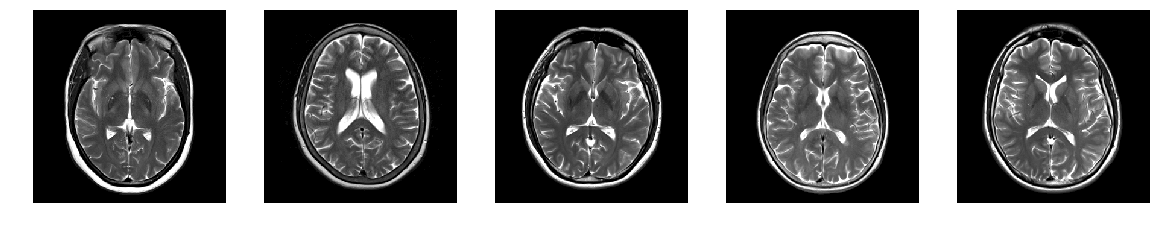

D:\SR_kspace\data\dl_bio\ax_t2_source_test\143346751565_1.npy
D:\SR_kspace\data\dl_bio\ax_t2_source_test\148972738042_3.npy
D:\SR_kspace\data\dl_bio\ax_t2_source_test\157538182959_2.npy
D:\SR_kspace\data\dl_bio\ax_t2_source_test\170221710773_3.npy
D:\SR_kspace\data\dl_bio\ax_t2_source_test\250325885499_2.npy


In [5]:
# some chosen images of the brain

fig, axs = plt.subplots(1, 5, figsize=(20,4))
    
axs[0].imshow(np.load(images[756])[0], cmap='gray')
axs[0].axis('off')
axs[1].imshow(np.load(images[857])[0], cmap='gray')
axs[1].axis('off')
axs[2].imshow(np.load(images[1000])[0], cmap='gray')
axs[2].axis('off')
axs[3].imshow(np.load(images[1235])[0], cmap='gray')
axs[3].axis('off')
axs[4].imshow(np.load(images[2548])[0], cmap='gray')
axs[4].axis('off')

plt.show()

print(images[756])
print(images[857])
print(images[1000])
print(images[1235])
print(images[2548])

**Let us save the images**

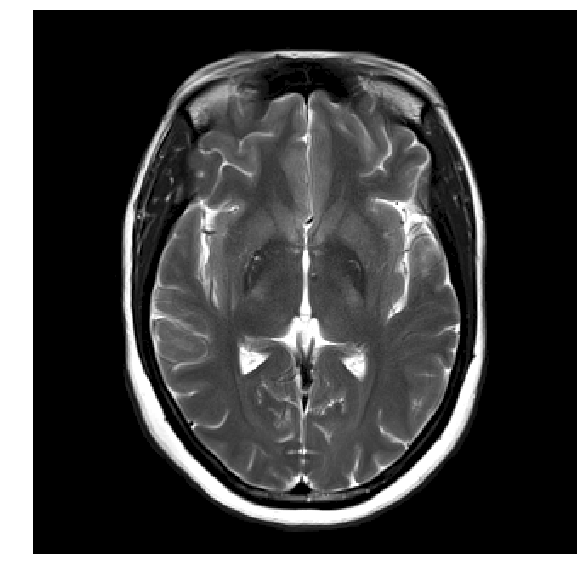

C:\Program Files\Python\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


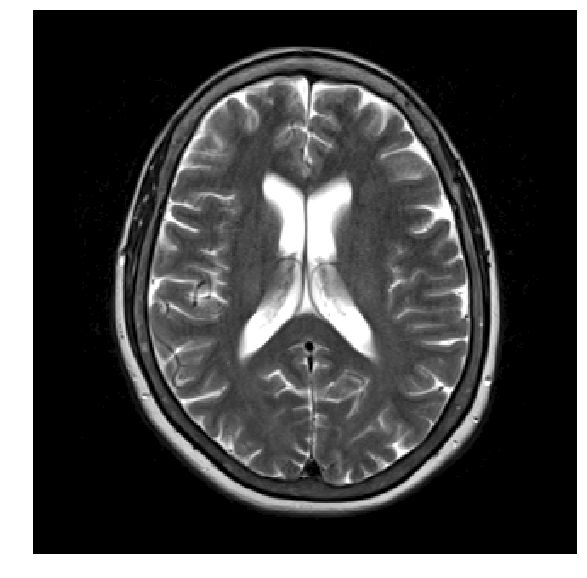

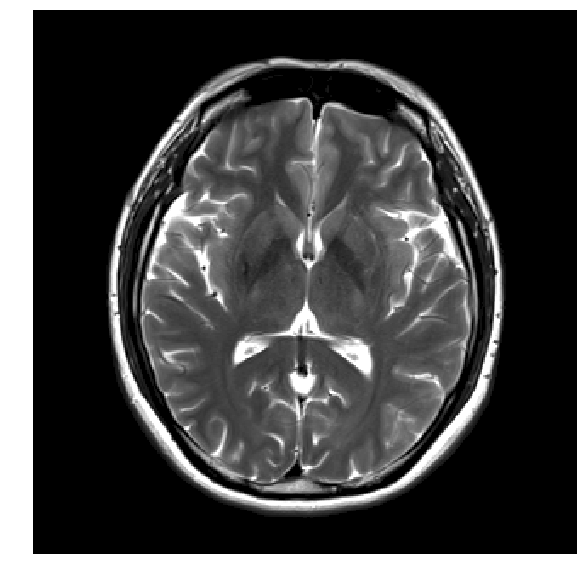

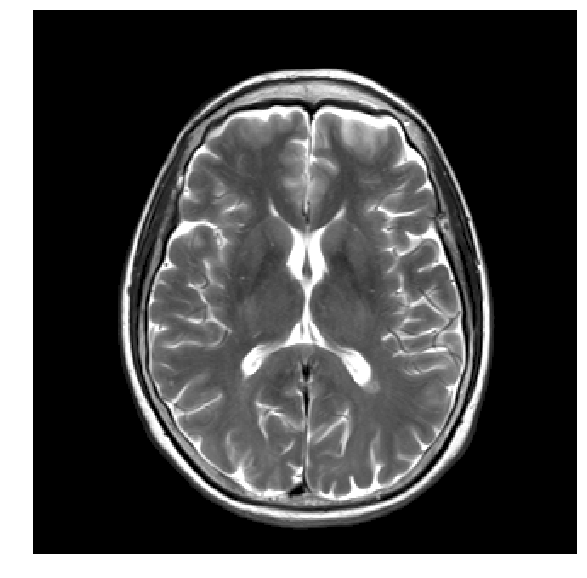

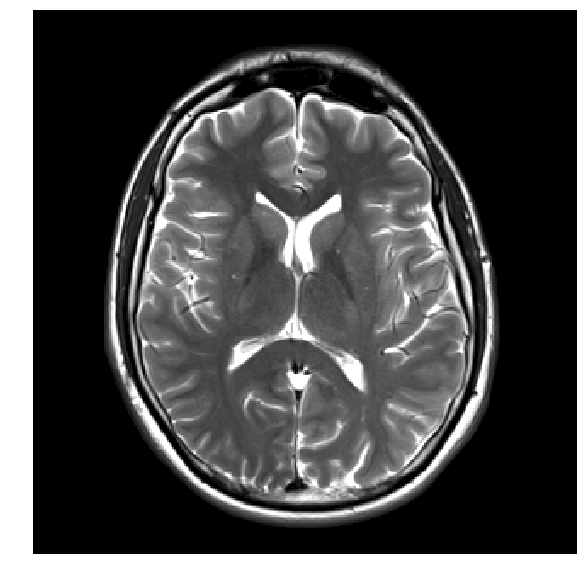

In [6]:
ch_images = [images[756], images[857], images[1000], images[1235], images[2548]]

for i in ch_images:
    number = i.split('\\')[-1].split('.')[0]
    plt.figure(figsize=(10,10))
    plt.imshow(np.load(i)[0], cmap='gray')
    plt.axis('off')
    plt.show()
    
    imsave(f'{number}.png', np.load(i)[0])

C:\Program Files\Python\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


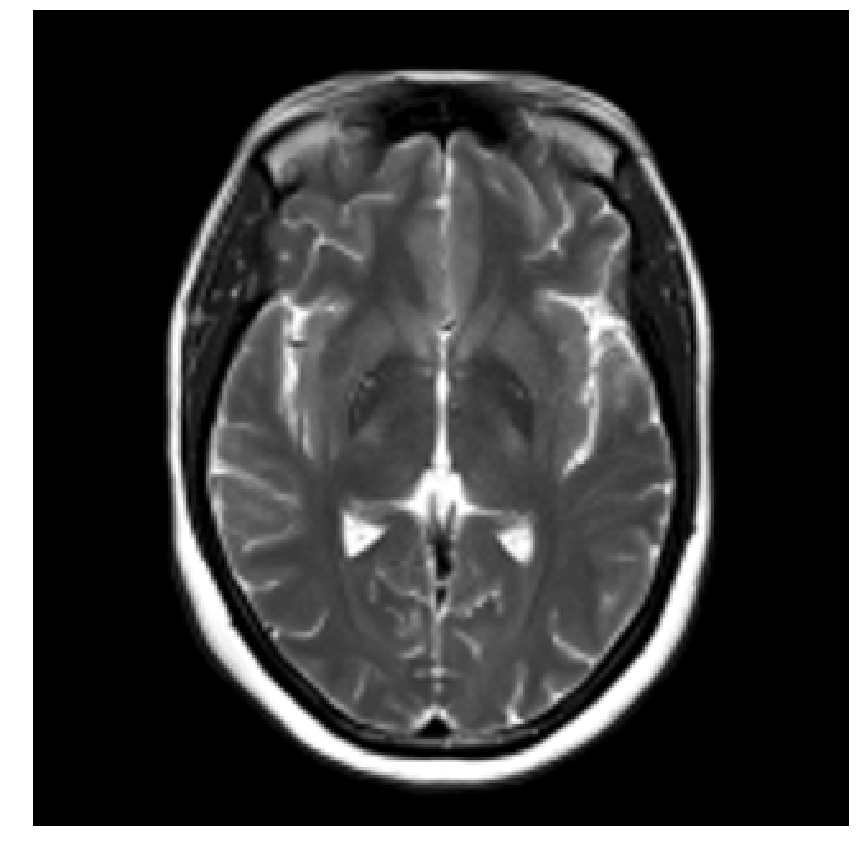

C:\Program Files\Python\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


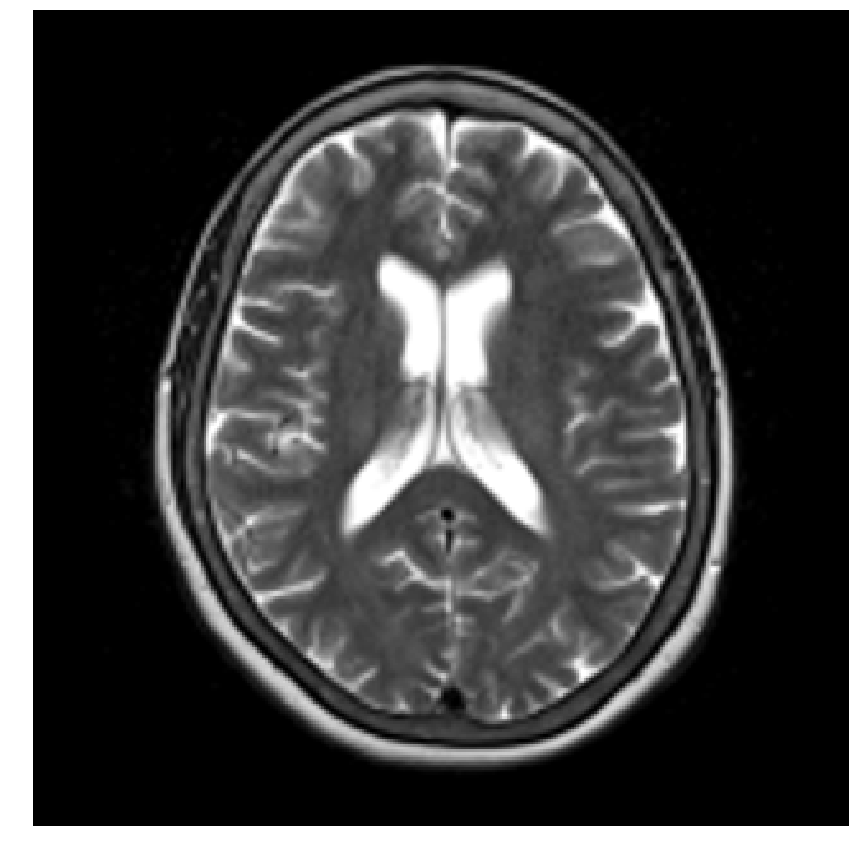

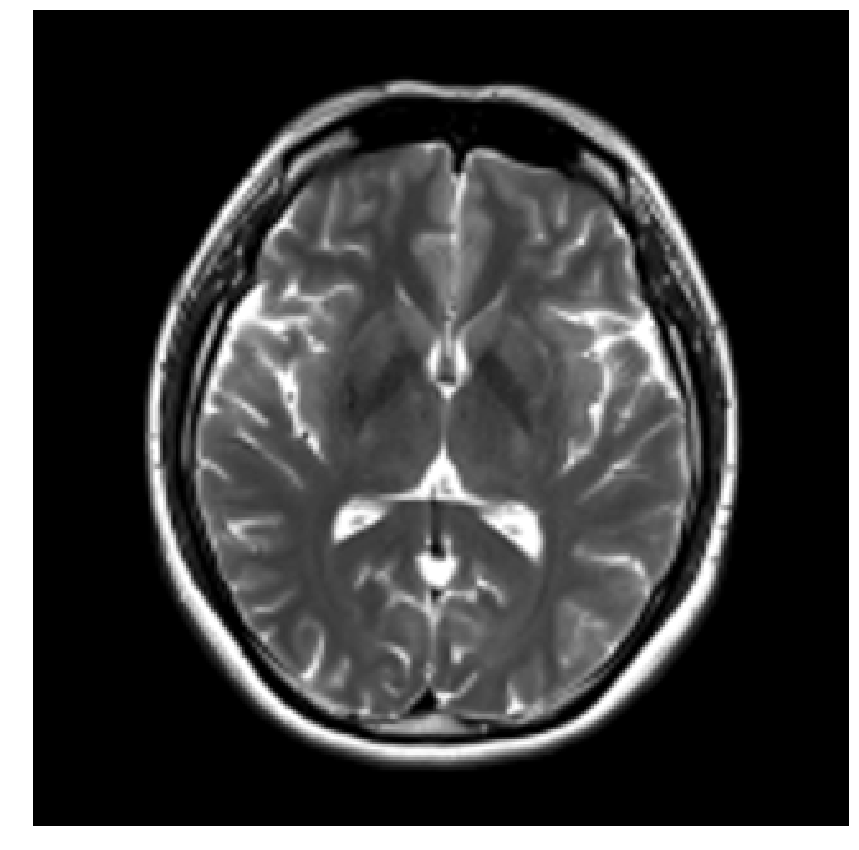

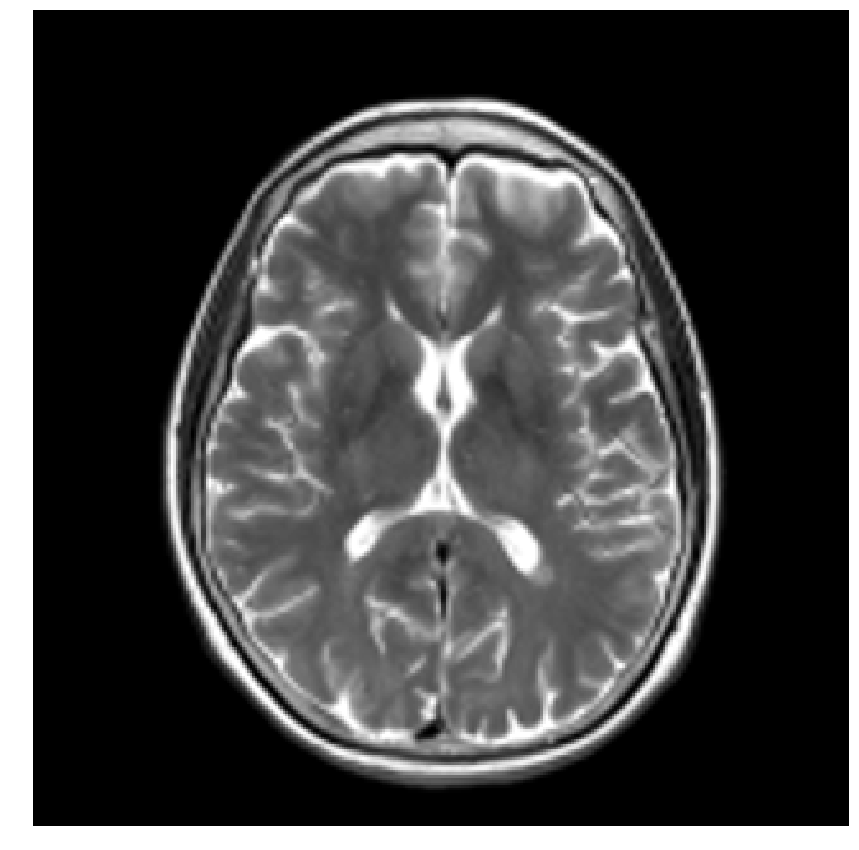

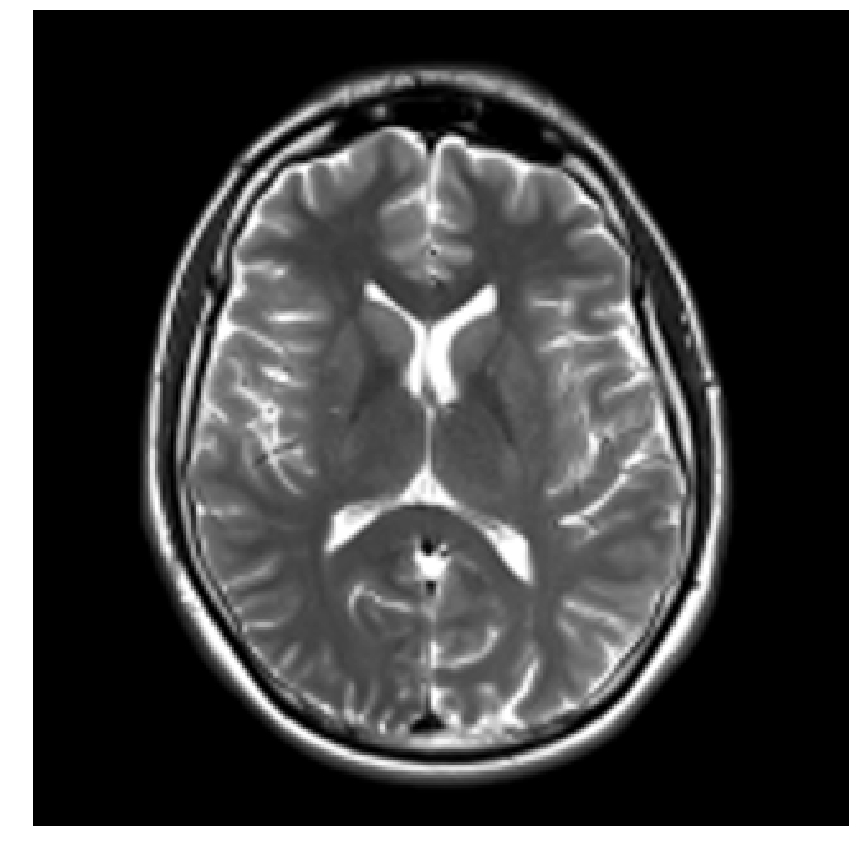

In [7]:
for i in ch_images:
    number = i.split('\\')[-1].split('.')[0]
    x2_resized = resize(np.load(i)[0], (160,160), order=1, preserve_range=True).astype(np.float32)
    x2_resized_back = resize(x2_resized, (320,320), order=3, preserve_range=True).astype(np.float32)
    
    plt.figure(figsize=(15,15))
    plt.imshow(x2_resized_back, cmap='gray')
    plt.axis('off')
    plt.show()
    
    imsave(f'{number}_x2.png', np.load(i)[0])

C:\Program Files\Python\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


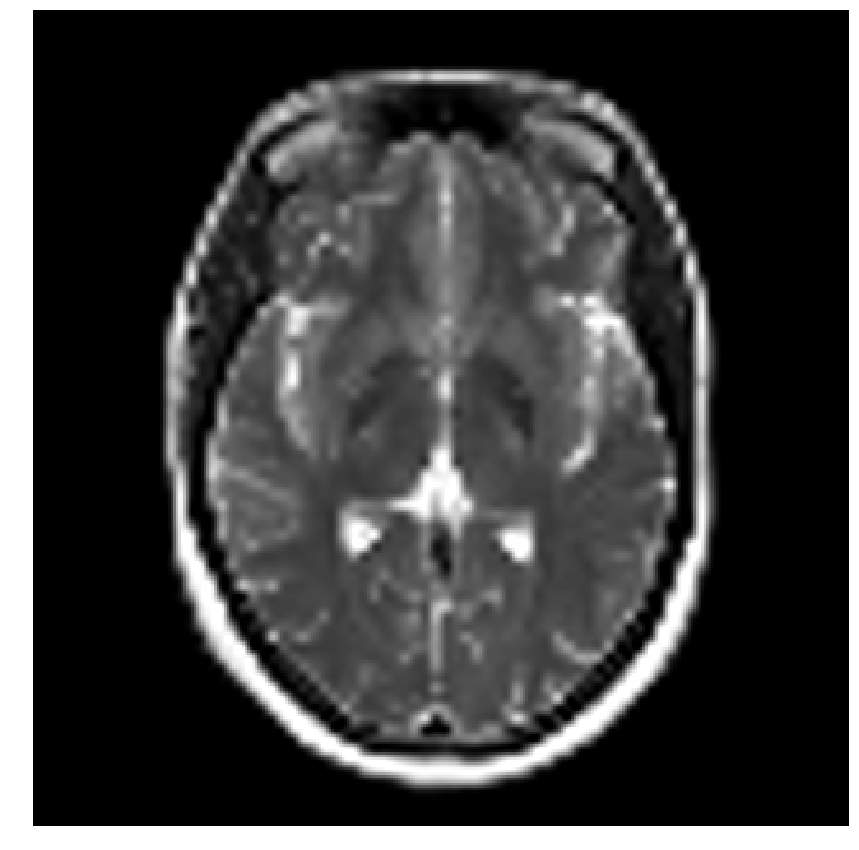

C:\Program Files\Python\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


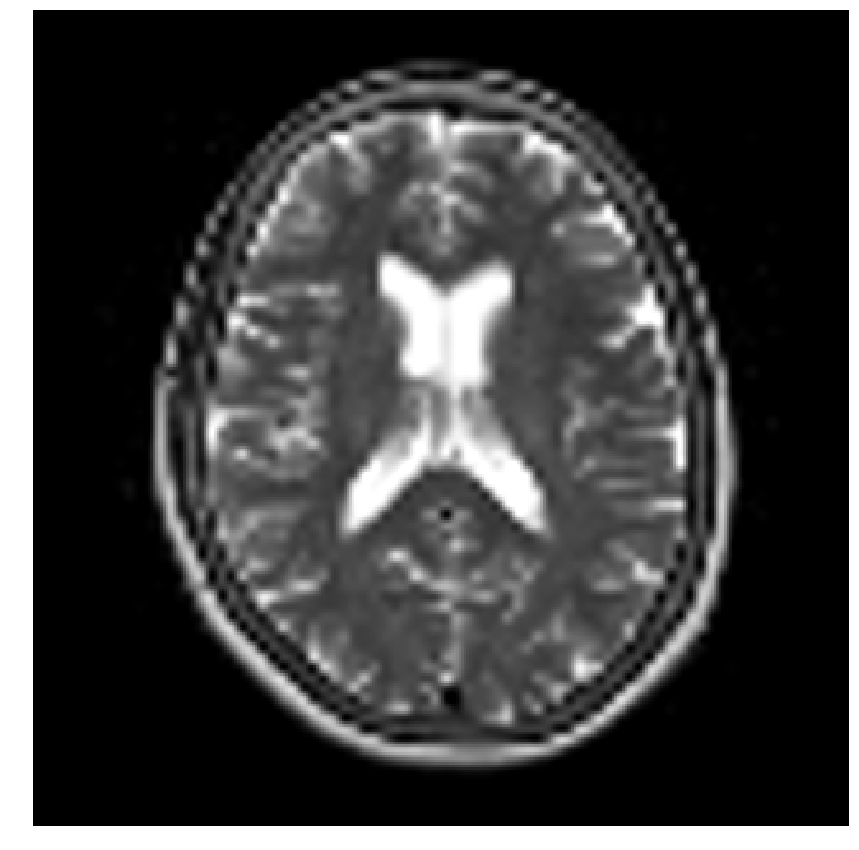

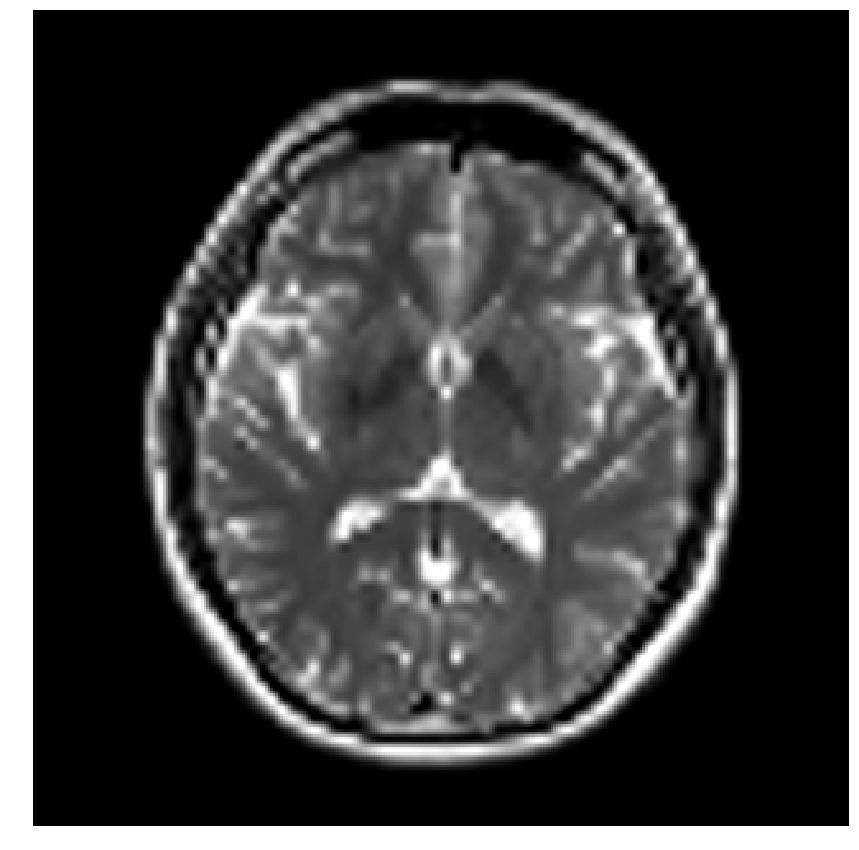

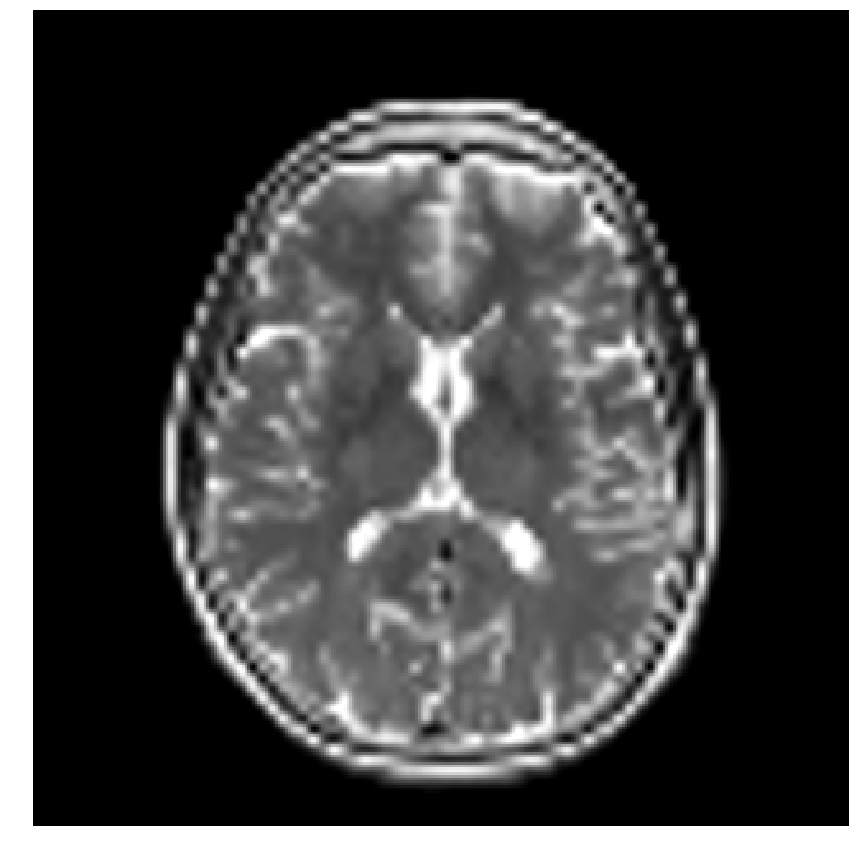

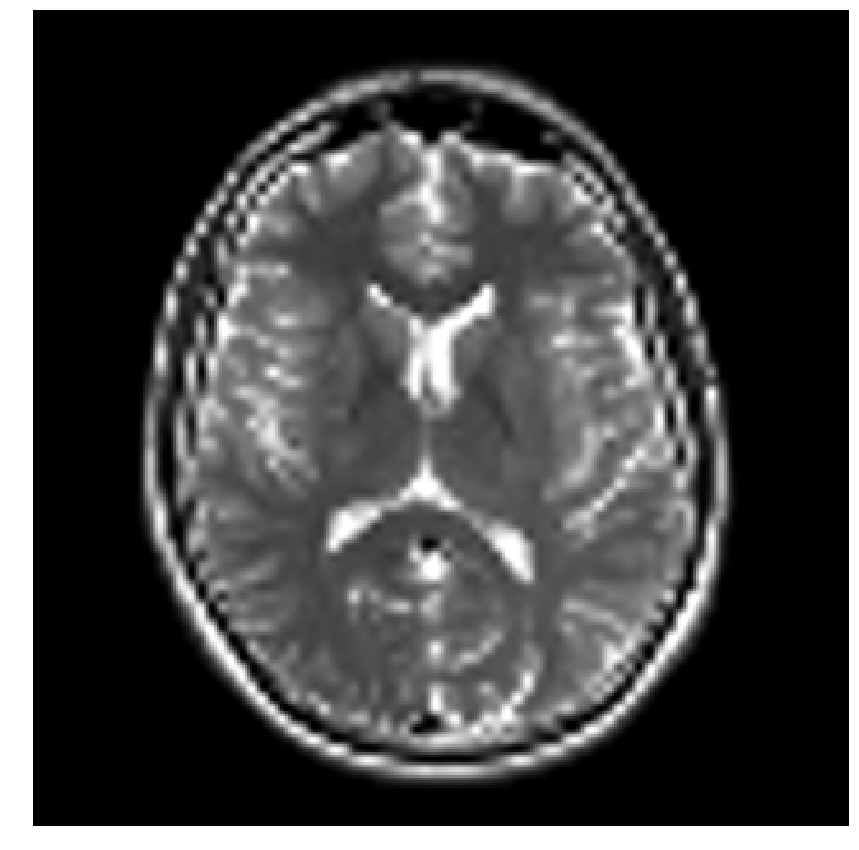

In [8]:
for i in ch_images:
    number = i.split('\\')[-1].split('.')[0]
    x4_resized = resize(np.load(i)[0], (80,80), order=1, preserve_range=True).astype(np.float32)
    x4_resized_back = resize(x4_resized, (320,320), order=3, preserve_range=True).astype(np.float32)
    
    plt.figure(figsize=(15,15))
    plt.imshow(x4_resized_back, cmap='gray')
    plt.axis('off')
    plt.show()
    
    imsave(f'{number}_x4.png', np.load(i)[0])

**Calculating the metrics for all of the test images**

In [9]:
x2_mae = []
x2_psnr = []
x2_ssim = []

for img in images:
    image = np.load(img)[0]
    
    x2_resized = resize(image, (160,160), order=1, preserve_range=True).astype(np.float32)
    x2_resized_back = resize(x2_resized, (320,320), order=3, preserve_range=True).astype(np.float32)
    
#     fig, axs = plt.subplots(1, 3, figsize=(12,6))
    
#     axs[0].imshow(image, cmap='gray', vmin=0, vmax=1)
#     axs[1].imshow(x2_resized, cmap='gray')
#     axs[2].imshow(x2_resized_back, cmap='gray')
    
#     axs[0].set_title("Image", fontsize=10)
#     axs[1].set_title("Resized to 160x160 image", fontsize=10)
#     axs[2].set_title("Resized back to 320x320 image", fontsize=10)
    
#     plt.show()

    res = compare_imgs(image, x2_resized_back)
    
    x2_mae.append(res[0])
    x2_psnr.append(res[1])
    x2_ssim.append(res[2])
    
#     break
    
print("For x2 upsampling:\n MAE mean = ", np.mean(x2_mae), "\n PSNR mean = ", np.mean(x2_psnr),
      "\n SSIM mean = ", np.mean(x2_ssim))

C:\Program Files\Python\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


For x2 upsampling:
 MAE mean =  0.019872408 
 PSNR mean =  27.57919940289469 
 SSIM mean =  0.947135397619248


In [10]:
x4_mae = []
x4_psnr = []
x4_ssim = []

for img in images:
    image = np.load(img)[0]
    
    x4_resized = resize(image, (80,80), order=1, preserve_range=True).astype(np.float32)
    x4_resized_back = resize(x4_resized, (320,320), order=3, preserve_range=True).astype(np.float32)
    
#     fig, axs = plt.subplots(1, 3, figsize=(12,6))
    
#     axs[0].imshow(image, cmap='gray', vmin=0, vmax=1)
#     axs[1].imshow(x4_resized, cmap='gray')
#     axs[2].imshow(x4_resized_back, cmap='gray')
    
#     axs[0].set_title("Image", fontsize=10)
#     axs[1].set_title("Resized to 160x160 image", fontsize=10)
#     axs[2].set_title("Resized back to 320x320 image", fontsize=10)
    
#     plt.show()
#     print(type(image), type(x4_resized_back), x4_resized_back.dtype)
    res = compare_imgs(image, x4_resized_back)
    
    x4_mae.append(res[0])
    x4_psnr.append(res[1])
    x4_ssim.append(res[2])
#     break
    
print("For x4 upsampling:\n MAE mean = ", np.mean(x4_mae), "\n PSNR mean = ", np.mean(x4_psnr),
      "\n SSIM mean = ", np.mean(x4_ssim))

C:\Program Files\Python\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


For x4 upsampling:
 MAE mean =  0.03623884 
 PSNR mean =  22.048851603735706 
 SSIM mean =  0.8498230313149003
